In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [82]:
data = pd.read_csv("data/Question4.csv")

### 4.1 Nan count

In [83]:
for col in data.head():
    print(f"Nan values in {col}:", sum(1 if pd.isnull(data[col][i]) else 0 for i in range(data[col].size)))

Nan values in id: 0
Nan values in date: 0
Nan values in price: 0
Nan values in bedrooms: 0
Nan values in bathrooms: 0
Nan values in sqft_living: 0
Nan values in sqft_lot: 0
Nan values in floors: 0
Nan values in waterfront: 0
Nan values in view: 0
Nan values in condition: 0
Nan values in grade: 0
Nan values in sqft_above: 0
Nan values in sqft_basement: 0
Nan values in yr_built: 0
Nan values in yr_renovated: 0
Nan values in zipcode: 0
Nan values in lat: 0
Nan values in long: 0
Nan values in sqft_living15: 0
Nan values in sqft_lot15: 0


### 4.2 Correlation

In [84]:
c=data.corr(numeric_only=True)

In [85]:
rs = np.random.RandomState(0)
c.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


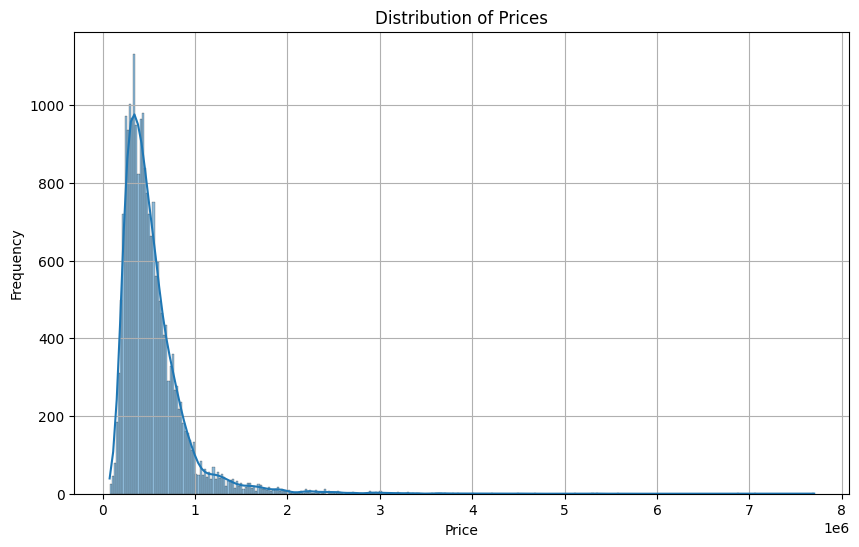

In [88]:
import seaborn as sb
plt.figure(figsize=(10, 6))
sb.histplot(data['price'], kde=True)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

sqft_living


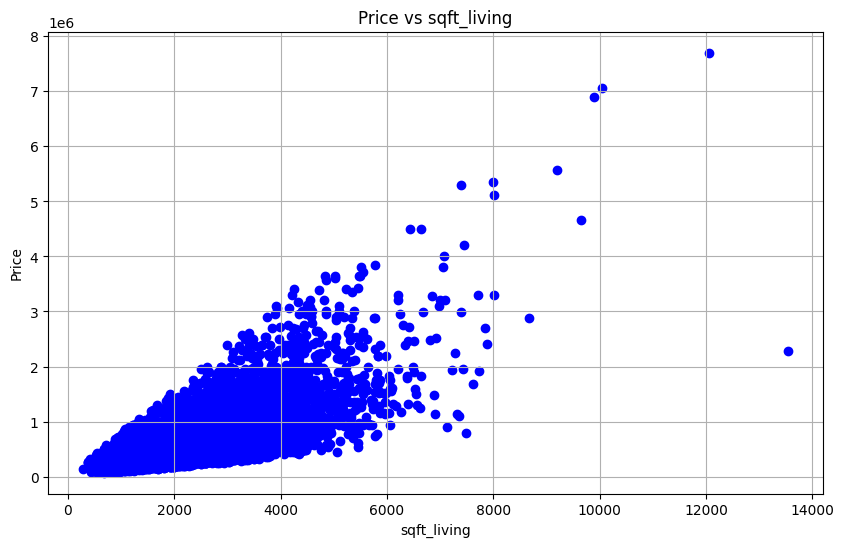

In [86]:
most_corr = data.corr(numeric_only=True)['price'].drop('price').idxmax()
plt.figure(figsize=(10, 6))
plt.scatter(data[most_corr], data['price'], color='blue')
plt.title(f"Price vs {most_corr}")
plt.xlabel(most_corr)
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [111]:
date=data['date']
year, month=[],[]
for d in date:
    year.append(d[:4])
    month.append(d[4:6])
data['year']=year
data['month']=month
data=data.drop('date', axis=1)

In [118]:

x_train, x_val, y_train, y_val = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.25)
train_scaler=MinMaxScaler()
x_train = train_scaler.fit_transform(x_train)
val_scaler=MinMaxScaler()
x_val = val_scaler.fit_transform(x_val)
